# Pymaceuticals Inc.
---

### Analysis

- 
 

In [196]:
# Dependencies and Setup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame using the 'Mouse ID' column as the key
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [197]:
# Check the number of mice in the dataset
number_of_mice = mouse_metadata['Mouse ID'].nunique()
print(f"Number of mice: {number_of_mice}")


Number of mice: 249


In [198]:
# Find duplicate mice by Mouse ID and Timepoint
print(f'number of mice: {number_of_mice}')

duplicate_mice = study_results[study_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_mice)

duplicate_mouse_ids = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

number of mice: 249
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
107      g989          0           45.000000                 0
137      g989          0           45.000000                 0
329      g989          5           48.786801                 0
360      g989          5           47.570392                 0
620      g989         10           51.745156                 0
681      g989         10           49.880528                 0
815      g989         15           51.325852                 1
869      g989         15           53.442020                 0
950      g989         20           55.326122                 1
1111     g989         20           54.657650                 1


In [199]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = study_results[study_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_mouse_data)


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
107      g989          0           45.000000                 0
137      g989          0           45.000000                 0
329      g989          5           48.786801                 0
360      g989          5           47.570392                 0
620      g989         10           51.745156                 0
681      g989         10           49.880528                 0
815      g989         15           51.325852                 1
869      g989         15           53.442020                 0
950      g989         20           55.326122                 1
1111     g989         20           54.657650                 1


In [200]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop the duplicate mice by Mouse ID and Timepoint
duplicate_mouse_ids = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
clean_df = combined_data[~(combined_data.duplicated(subset="Mouse ID", keep=False) & combined_data["Mouse ID"].eq("g989"))].copy() 
clean_df

# Display the cleaned DataFrame



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [201]:
# Check the number of mice in the cleaned DataFrame
print(f'Number of Mice after cleaning: ',len(combined_data.groupby('Mouse ID').count()))
combined_data.head()


Number of Mice after cleaning:  249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [202]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df['Tumor Volume (mm3)'] = pd.to_numeric(clean_df['Tumor Volume (mm3)'], errors='coerce')
mean_tumor_volume = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().rename('Mean')
median_tumor_volume = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().rename('Median')
tumor_volume_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().rename('Variance')
tumor_volume_stddev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().rename('Std. Dev.')
tumor_volume_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().rename('SEM')


clean_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': tumor_volume_variance,
    'Tumor Volume Std. Dev.': tumor_volume_stddev,
    'Tumor Volume SEM': tumor_volume_sem
})
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [203]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Generate summary statistics for tumor volume using the aggregation method

summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_SEM='sem'
).reset_index()

summary_df

,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

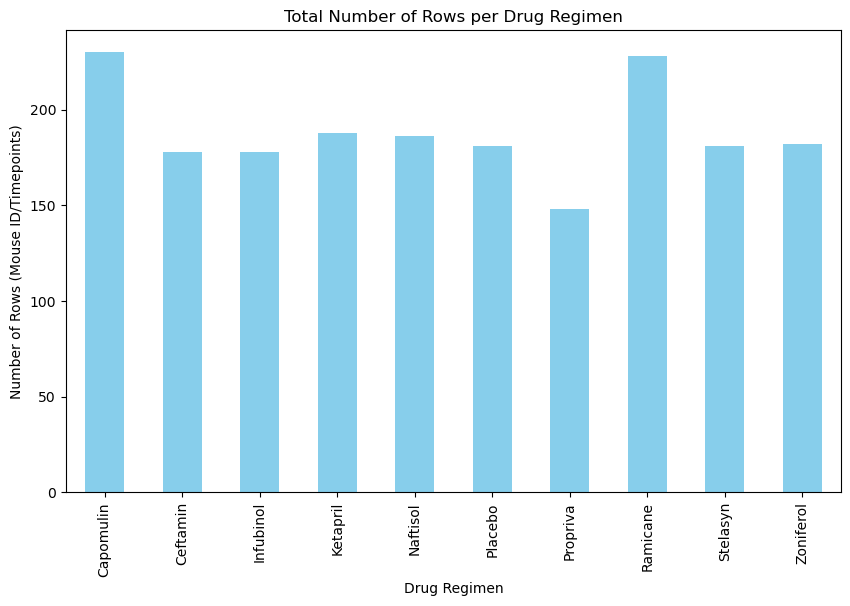

In [204]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen


# Ensure column names are stripped of extra spaces
clean_df.columns = clean_df.columns.str.strip()

# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
row_counts = clean_df.groupby('Drug Regimen').size()

# Generate the bar plot
row_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', title="Total Number of Rows per Drug Regimen")

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")

# Display the plot
plt.show()

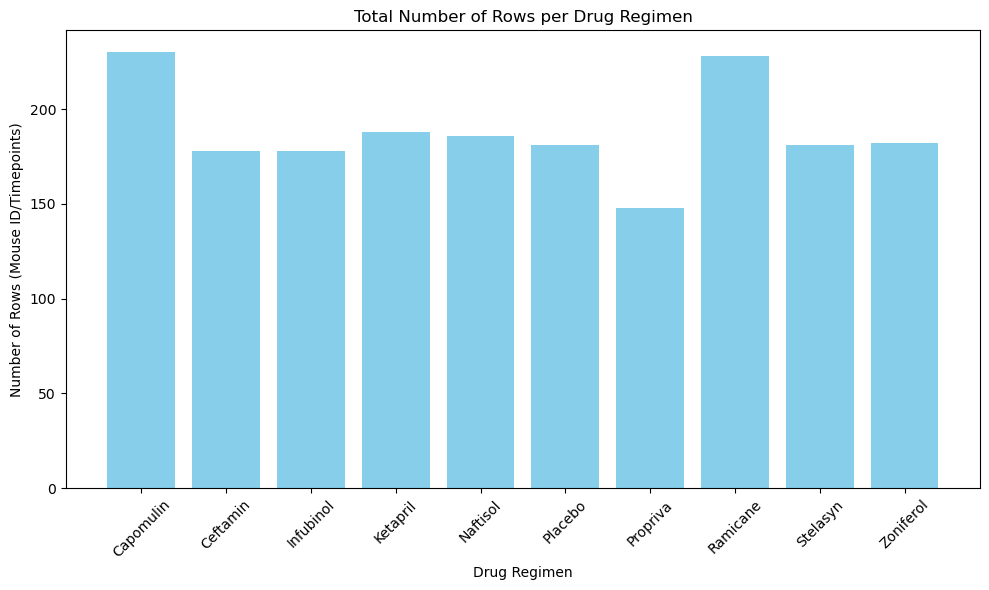

In [205]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
clean_df.columns = clean_df.columns.str.strip()
row_counts = clean_df.groupby('Drug Regimen').size()
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(row_counts.index, row_counts.values, color='skyblue')  # Create bar plot
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.title("Total Number of Rows per Drug Regimen")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to ensure everything fits well
plt.show()

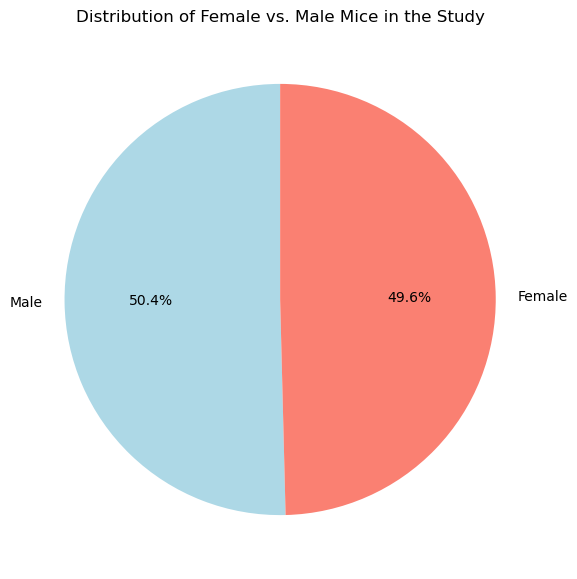

In [206]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = clean_df[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of male and female mice
gender_counts = unique_mice_gender['Sex'].value_counts()

# Generate the pie chart
plt.figure(figsize=(7, 7))  # Set figure size
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])

# Add title
plt.title("Distribution of Female vs. Male Mice in the Study")

# Display the plot
plt.ylabel('')  # Remove the y-axis label as it's not needed for a pie chart
plt.show()


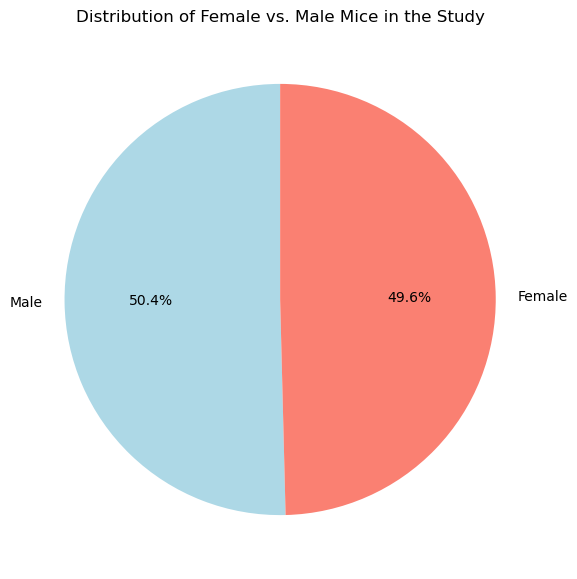

In [207]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice_gender = clean_df[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of male and female mice
gender_counts = unique_mice_gender['Sex'].value_counts()

# Generate the pie chart
plt.figure(figsize=(7, 7))  # Set figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])

# Add title
plt.title("Distribution of Female vs. Male Mice in the Study")

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [208]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Filter the dataset to include only the four treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_df[clean_df['Drug Regimen'].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoint_df = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last timepoint DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, filtered_df, on=['Mouse ID', 'Timepoint'])

# Select only relevant columns (Mouse ID, Drug Regimen, Tumor Volume (mm3))
final_tumor_volume_df = final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Display the final tumor volumes
print(final_tumor_volume_df)


   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [209]:
# Step 1: List of treatments to loop over
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Step 2: Create an empty list to hold tumor volume data for each treatment
tumor_vol_data = []

# Step 3: Loop through each treatment and calculate the IQR and detect outliers
for treatment in treatments:
    # Filter the data for the current treatment
    treatment_data = clean_df[clean_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate the quartiles and IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    
    # Determine the upper and lower bounds for potential outliers
    lower_bound = quartiles[0.25] - 1.5 * IQR
    upper_bound = quartiles[0.75] + 1.5 * IQR
    
    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Add tumor volume data and outliers information to the list
    tumor_vol_data.append({
        'Treatment': treatment,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': outliers,
        'Tumor Volume Data': treatment_data
    })
    
    # Print out the results for the current treatment
    print(f"Treatment: {treatment}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Outliers: {outliers}")
    print(f"  Number of Outliers: {len(outliers)}\n")
    
# The tumor_vol_data list now contains all necessary information for each treatment



Treatment: Capomulin
  Lower Bound: 26.714832162499995
  Upper Bound: 55.9711007025
  Outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
  Number of Outliers: 2

Treatment: Ramicane
  Lower Bound: 24.1865864625
  Upper Bound: 57.488048122500004
  Outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
  Number of Outliers: 1

Treatment: Infubinol
  Lower Bound: 32.309217298749985
  Upper Bound: 72.31757996875001
  Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
  Number of Outliers: 0

Treatment: Ceftamin
  Lower Bound: 32.81891142624998
  Upper Bound: 71.19095325625001
  Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
  Number of Outliers: 0



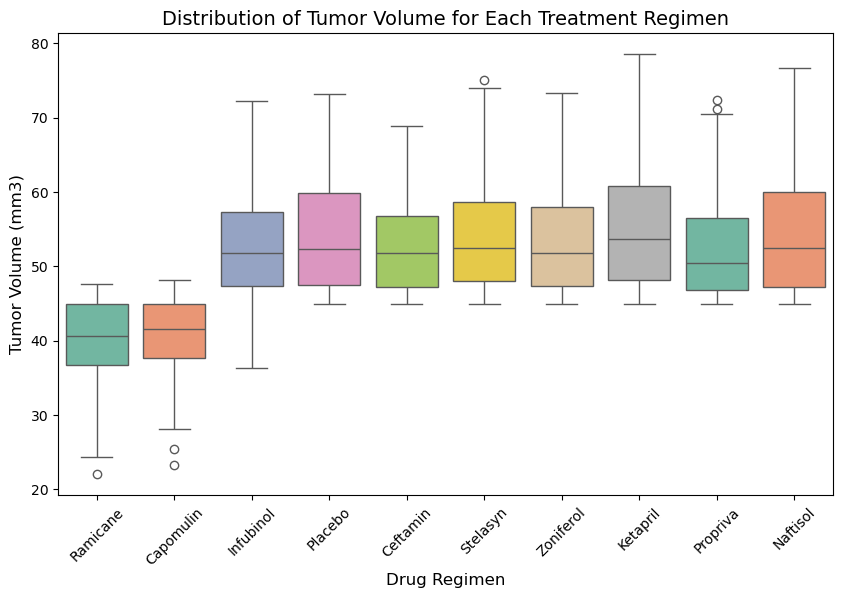

In [214]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Generate a box plot for tumor volume for each treatment regimen
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=clean_df, hue='Drug Regimen', palette='Set2', legend=False)

# Add labels and title
plt.title('Distribution of Tumor Volume for Each Treatment Regimen', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Line and Scatter Plots

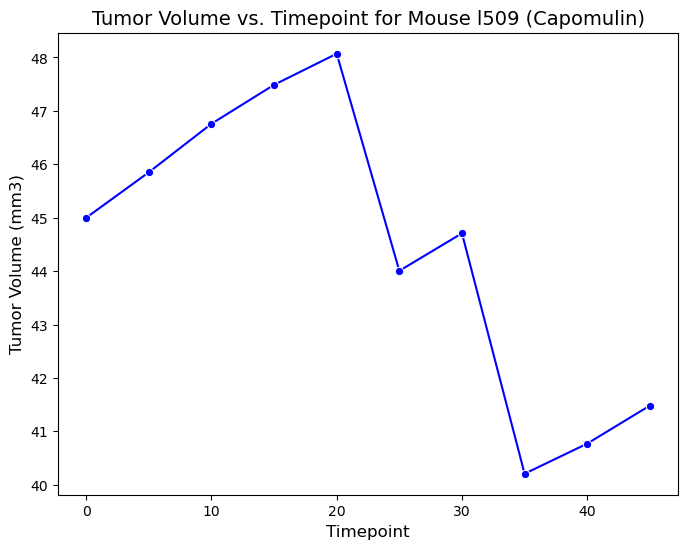

In [218]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for the Capomulin treatment regimen and the mouse of interest (for example, Mouse ID 'l509')
mouse_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
single_mouse_data = mouse_data[mouse_data['Mouse ID'] == 'l509']

# Generate the line plot of tumor volume vs. timepoint
plt.figure(figsize=(8, 6))
sns.lineplot(x='Timepoint', y='Tumor Volume (mm3)', data=single_mouse_data, marker='o', color='b')

# Add labels and title
plt.title('Tumor Volume vs. Timepoint for Mouse l509 (Capomulin)', fontsize=14)
plt.xlabel('Timepoint', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

# Display the plot
plt.show()


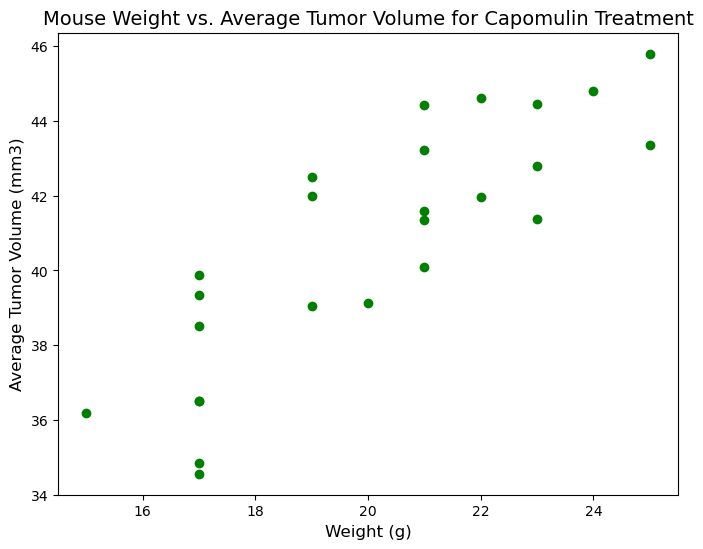

In [221]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin treatment regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume with the mouse metadata to get the mouse weights
capomulin_mouse_weights = pd.merge(avg_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Generate the scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_mouse_weights['Weight (g)'], capomulin_mouse_weights['Tumor Volume (mm3)'], color='green')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

# Display the plot
plt.show()



## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume: 0.84


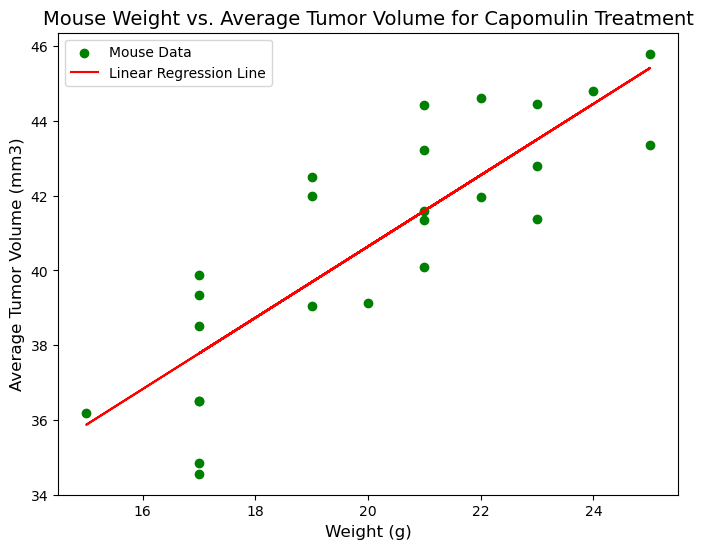

In [223]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter data for Capomulin treatment regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume with the mouse metadata to get the mouse weights
capomulin_mouse_weights = pd.merge(avg_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Extract the mouse weight and tumor volume
x_values = capomulin_mouse_weights['Weight (g)'].values.reshape(-1, 1)  # Reshape for scikit-learn
y_values = capomulin_mouse_weights['Tumor Volume (mm3)'].values

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(x_values.flatten(), y_values)
print(f"The correlation coefficient between mouse weight and average tumor volume: {correlation_coefficient:.2f}")

# Create a linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(x_values, y_values)

# Predict tumor volumes using the regression line
y_pred = linear_regressor.predict(x_values)

# Plot the scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_mouse_weights['Weight (g)'], capomulin_mouse_weights['Tumor Volume (mm3)'], color='green', label='Mouse Data')
plt.plot(capomulin_mouse_weights['Weight (g)'], y_pred, color='red', label='Linear Regression Line')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.legend()

# Display the plot
plt.show()
